<a href="https://colab.research.google.com/github/Noah-Gallego/cardiac_challenge/blob/main/task1ArrhythmiaClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with Task 1

Instructions:
- Download the dataset from the [ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)
- Unzip the `archive.zip` file
- Rename the folder `archive` as `ecg_dataset` and place it in the root of the git repository

References:
- [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf)

## Load dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


## The PTB Diagnostic ECG Database

- Number of Samples: 14552
- Number of Categories: 2
- Sampling Frequency: 125Hz
- Data Source: Physionet's PTB Diagnostic Database
- ECG lead II re-sampled to the sampling frequency of 125Hz as the input (from [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf))
- Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.
- The final element of each row denotes the class to which that example belongs.


The shape of the normal dataframe is :  (4046, 188)
Class :  0.0
The shape of the abnormal dataframe is :  (10506, 188)
Class :  1.0
The last time value is :  1488.0


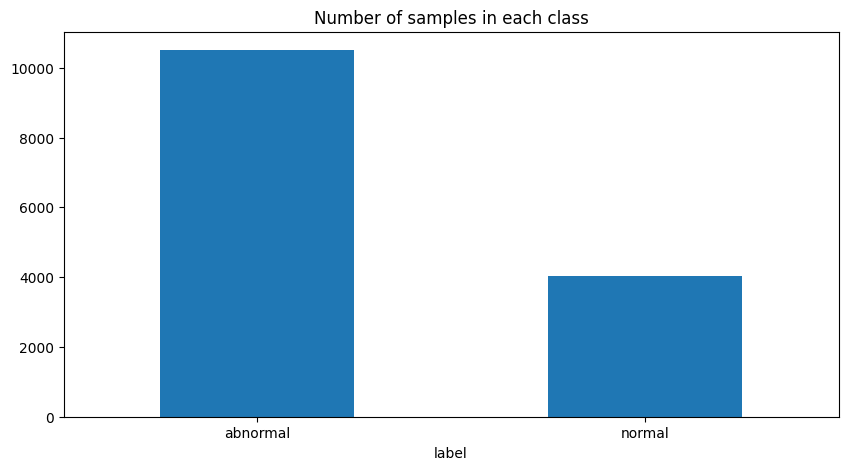

In [ ]:
df_ptbd_normal = pd.read_csv("/content/drive/My Drive/ecg_dataset/ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("/content/drive/My Drive/ecg_dataset/ptbdb_abnormal.csv", header = None)

# print shapes of the dataframes
print("The shape of the normal dataframe is : ", df_ptbd_normal.shape)
# print one example of the last column
print("Class : ", df_ptbd_normal.iloc[:, -1][0])
print("The shape of the abnormal dataframe is : ", df_ptbd_abnormal.shape)
# print one example of the last column
print("Class : ", df_ptbd_abnormal.iloc[:, -1][0])

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal",
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_ptbd_normal.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_ptbd_normal.columns = list(time) + ["label"]
df_ptbd_abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal], axis = 0)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

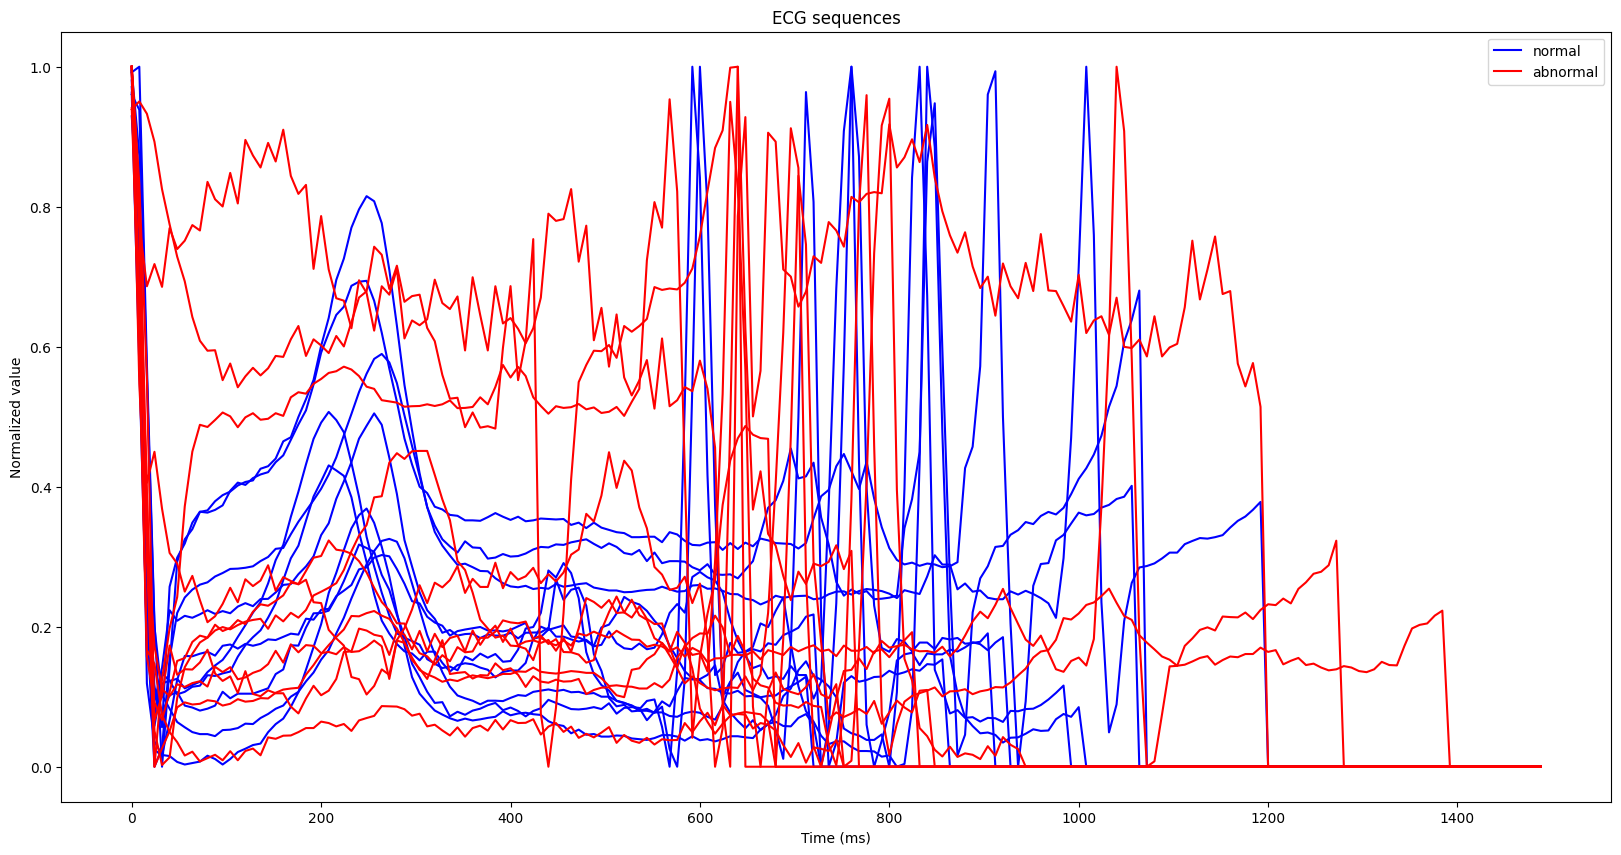

In [ ]:
# plot a a row of the dataframe
# select 10 random sequences with class 0 (normal) and 10 with class 1 (abnormal)
df_ptbd_normal = df_ptbd[df_ptbd["label"] == 0].sample(10)
df_ptbd_abnormal = df_ptbd[df_ptbd["label"] == 1].sample(10)

# create a figure
plt.figure(figsize = (20, 10))
# plot againts the column names (time)
# plot the normal sequences
for i in range(df_ptbd_normal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1], color = "blue", label = "normal")
    else:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1],color = "blue")
# plot the abnormal sequences
for i in range(df_ptbd_abnormal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red", label = "abnormal")
    else:
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red")
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

In [313]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [314]:
X = df_ptbd.iloc[:, :187].values # Getting all columns except the last (b/c of label)
y = df_ptbd.iloc[:, 187].values
print("PREVIOUS SHAPE: \n", "X SHAPE: ", X.shape)
print("PREVIOUS SHAPE: \n", "Y SHAPE: ", y.shape)

X = X.reshape(-1, 187) # Reshapes X to (# of rows, 187)
y = y.reshape(-1, 1) # Reshapes y to (# of rows, 1)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

print("\n\nCURRENT SHAPE: \n", "X SHAPE: ", X_tensor.shape)
print("\nCURRENT SHAPE: \n", "y SHAPE: ", y_tensor.shape)

PREVIOUS SHAPE: 
 X SHAPE:  (14552, 187)
PREVIOUS SHAPE: 
 Y SHAPE:  (14552,)


CURRENT SHAPE: 
 X SHAPE:  torch.Size([14552, 187])

CURRENT SHAPE: 
 y SHAPE:  torch.Size([14552, 1])


In [349]:
# Split into training and test sets (80 - 20)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define Neural Network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(187, 64)
        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(64, 32)
        self.relu = nn.ReLU()

        # Softmax Layer
        self.fc3 = nn.Linear(32, 1)
        self.softmax = nn.Sigmoid()

    # Define forward pass (how inputs move through already defined Network)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)

        out = self.fc2(out)
        out = self.relu(out)

        out = self.fc3(out)
        out = self.softmax(out)

        return out


input_dim = X.shape[1]
output_dim = 1

model = NeuralNet()

criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.0005) # Adam Optimizer

# Converting Train/Test Data back into Pytorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-349-60dceb0ea065>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
<ipython-input-349-60dceb0ea065>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
<ipython-input-349-60dceb0ea065>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-349-60dceb0ea065>:57: UserWarning: To copy construct from a tensor, it is re

In [350]:
# Getting Epoc and Batch Sizes Defined
num_epochs = 100
batch_size = 16

Epoch 0/100 -- Loss: 0.0527
Epoch 5/100 -- Loss: 0.0121
Epoch 10/100 -- Loss: 0.0051
Epoch 15/100 -- Loss: 0.0071
Epoch 20/100 -- Loss: 0.0050
Epoch 25/100 -- Loss: 0.0002
Epoch 30/100 -- Loss: 0.0005
Epoch 35/100 -- Loss: 0.0002
Epoch 40/100 -- Loss: 0.0005
Epoch 45/100 -- Loss: 0.0011
Epoch 50/100 -- Loss: 0.0000
Epoch 55/100 -- Loss: 0.0000
Epoch 60/100 -- Loss: 0.0000
Epoch 65/100 -- Loss: 0.0000
Epoch 70/100 -- Loss: 0.0000
Epoch 75/100 -- Loss: 0.0000
Epoch 80/100 -- Loss: 0.0000
Epoch 85/100 -- Loss: 0.0000
Epoch 90/100 -- Loss: 0.0000
Epoch 95/100 -- Loss: 0.0000
Epoch 100/100 -- Loss: 0.0000


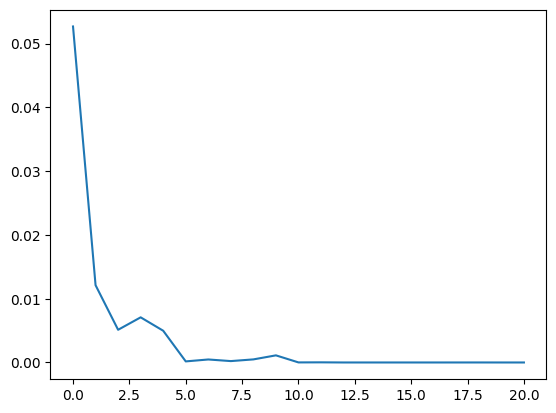

In [351]:
loss_list = []
for epoch in range(num_epochs + 1):
   # Mini Batch Training
    for i in range(0, len(X_train), batch_size):
      # Create Splices of Data
      batch_X = X_train_tensor[i:i+batch_size]
      batch_y = y_train_tensor[i:i+batch_size]

      # Forward Pass
      outputs = model(batch_X)
      loss = criterion(outputs, batch_y)

      # Backward Pass (Backpropagation)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    if(epoch % 5 == 0):
      loss_list.append(loss.item())
      print(f"Epoch {epoch}/{num_epochs} -- Loss: {loss.item():.4f}")

# Plot Loss
x = range(len(loss_list))
y = loss_list
plt.plot(x, y)
plt.show()

In [346]:
# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted_labels = torch.round(outputs)
    accuracy = (predicted_labels == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print("Test Accuracy:", accuracy)

Test Accuracy: 0.971830985915493
